# Getting the node information running

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')
df.KICID = df['KICID'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Columns: 167 entries, KICID to ast_M_err
dtypes: bool(2), float64(149), int64(5), object(11)
memory usage: 7.0+ MB


In [3]:
nodes = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/nodelist.txt',skiprows=[1])
nodes.rename(columns={'Kepler_ID':'KICID'},inplace=True)
nodes.KICID = nodes['KICID'].astype('str')
df = pd.merge(df, nodes, how='left', on='KICID')
df.head()

,KICID,kepmag_x,Length_Quarters,Length_days,numax,numax_err,dnu,dnu_err,amplitude,err.2_x,...,BC_GRP,BC_J,BC_H,BC_K,ast_MKs,ast_MH,ast_MJ,ast_MG,ast_M_err,Skygroup_ID
0,892760,13.23,6,380.8,29.48,0.48,3.962,0.116,149.7,8.3,...,0.388,1.206,1.638,1.766,-1.671046,-1.543046,-1.111046,0.343954,0.206767,84
1,1026084,12.14,15,1139.0,41.17,0.90,4.414,0.061,63.8,2.9,...,0.409,1.252,1.706,1.840,-1.878376,-1.744376,-1.290376,0.205624,0.166498,84
2,1026452,12.94,18,1318.1,34.50,0.52,3.967,0.078,83.3,4.3,...,0.446,1.264,1.707,1.837,-1.973433,-1.843433,-1.400433,0.057567,0.164665,84
3,1160684,14.91,17,1308.7,26.38,0.97,3.361,0.223,121.1,8.3,...,-0.063,1.345,2.158,2.394,-1.531489,-1.295489,-0.482489,1.838511,0.330264,84
4,1160789,9.70,18,1318.1,24.72,0.62,3.509,0.048,149.0,7.3,...,0.255,1.291,1.867,2.029,-1.570336,-1.408336,-0.832336,0.948664,0.112440,84


In [4]:
ccd = np.array([int((id- 1)/4) for id in df['Skygroup_ID'].values])

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


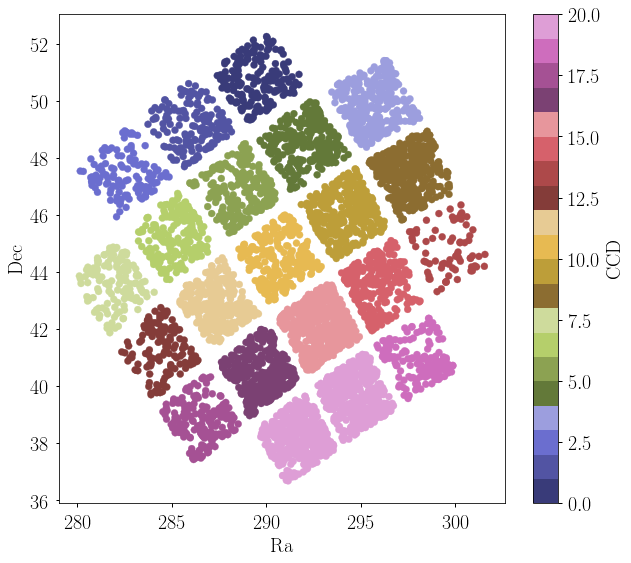

In [5]:
fig, ax = plt.subplots(figsize=(10,9))
c = ax.scatter(df.ra, df.dec, c=ccd, cmap= 'tab20b')
ax.set_xlabel('Ra')
ax.set_ylabel('Dec')
fig.colorbar(c, label='CCD')
plt.show()